In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_agg = pd.read_csv('data/aggregate_data.csv')
df_agg.drop(columns='Unnamed: 0',inplace=True)

In [3]:
df_norm = pd.read_csv('data/pbp_data_mvp.csv')
df_norm.drop(columns='Unnamed: 0',inplace=True)
df_norm.Date = pd.to_datetime(df_norm.Date)

In [4]:
df_norm.head(5)

,Date,game_in_series,day_of_week,away_team,away_league,away_team_game_number,home_team,home_league,home_team_game_number,away_team_score,home_team_score,number_of_outs,day_or_night,date_game_completed,forfeit_info,protest_info,park_id,attendance,time_of_game,away_line_scores,home_line_scores,away_at_bats,away_hits,away_doubles,away_triples,away_hrs,away_rbi,away_sh,away_sf,away_hbp,away_walk,away_int_walk,away_so,away_sb,away_cs,away_gidp,away_catch_interference,away_left_on_base,away_pitchers_used,away_pitch_earned_runs,away_team_earned_runs,away_pitch_wild_pitches,away_pitch_balks,away_def_putouts,away_def_assists,away_def_errors,away_def_passed_balls,away_def_double_plays,away_def_triple_plays,home_at_bats,home_hits,home_doubles,home_triples,home_hrs,home_rbi,home_sh,home_sf,home_hbp,home_walk,home_int_walk,home_so,home_sb,home_cs,home_gidp,home_catch_interference,home_left_on_base,home_pitchers_used,home_pitch_earned_runs,home_team_earned_runs,home_pitch_wild_pitches,home_pitch_balks,home_def_putouts,home_def_assists,home_def_errors,home_def_passed_balls,home_def_double_plays,home_def_triple_plays,hb_ump_id,hb_ump_name,1b_ump_id,1b_ump_name,2b_ump_id,2b_ump_name,3b_ump_id,3b_ump_name,lf_ump_id,lf_ump_name,rf_ump_id,rf_ump_name,away_team_manager_id,away_team_manager_name,home_team_manager_id,home_team_manager_name,win_pitch_id,win_pitch_name,lose_pitch_id,lose_pitch_name,save_pitch_id,save_pitch_name,game_win_rbi_batter_id,game_win_rbi_batter_name,away_start_pitch_id,away_start_pitch_name,home_start_pitch_id,home_start_pitch_name,away_player_1_id,away_player_1_name,away_player_1_def_pos,away_player_2_id,away_player_2_name,away_player_2_def_pos,away_player_3_id,away_player_3_name,away_player_3_def_pos,away_player_4_id,away_player_4_name,away_player_4_def_pos,away_player_5_id,away_player_5_name,away_player_5_def_pos,away_player_6_id,away_player_6_name,away_player_6_def_pos,away_player_7_id,away_player_7_name,away_player_7_def_pos,away_player_8_id,away_player_8_name,away_player_8_def_pos,away_player_9_id,away_player_9_name,away_player_9_def_pos,home_player_1_id,home_player_1_name,home_player_1_def_pos,home_player_2_id,home_player_2_name,home_player_2_def_pos,home_player_3_id,home_player_3_name,home_player_3_def_pos,home_player_4_id,home_player_4_name,home_player_4_def_pos,home_player_5_id,home_player_5_name,home_player_5_def_pos,home_player_6_id,home_player_6_name,home_player_6_def_pos,home_player_7_id,home_player_7_name,home_player_7_def_pos,home_player_8_id,home_player_8_name,home_player_8_def_pos,home_player_9_id,home_player_9_name,home_player_9_def_pos,additional_info,acquisition_info,year,outcome,home_OBP,away_OBP,home_AVG,away_AVG,home_singles,away_singles,home_SLG,away_SLG,home_BABIP,away_BABIP,home_ISO,away_ISO,home_PASO,away_PASO,home_total_bases,away_total_bases,home_runs_created,away_runs_created,home_wOBA,away_wOBA,game_number_of_season,home_won_last_game,away_won_last_game,id,target,away_outcome,home_outcome
0,2000-03-30,0,Thu,NYN,NL,2,CHN,NL,2,5,1,66,N,NaN,NaN,NaN,TOK01,55000.0,235,00001000004,00001000000,37,6,2,0,1,5,1,1,1,8,0,5,1,0,0,0,10,5,0,0,0,0,33,14,2,0,2,0,36,5,0,0,0,0,2,0,0,6,1,9,0,0,2,0,10,7,5,5,0,0,33,14,0,0,0,0,herna901,Angel Hernandez,fostm901,Marty Foster,kulpr901,Ron Kulpa,marsr901,Randy Marsh,NaN,(none),NaN,(none),valeb102,Bobby Valentine,bayld001,Don Baylor,cookd001,Dennis Cook,yound002,Danny Young,NaN,(none),agbab001,Benny Agbayani,reedr002,Rick Reed,farnk001,Kyle Farnsworth,hendr001,Rickey Henderson,7,hamid001,Darryl Hamilton,8,alfoe001,Edgardo Alfonzo,4,piazm001,Mike Piazza,2,ventr001,Robin Ventura,5,belld001,Derek Bell,9,zeilt001,Todd Zeile,3,ordor001,Rey Ordonez,6,reedr002,Rick Reed,1,youne001,Eric Young,4,bufod001,Damon Buford,8,sosas001,Sammy Sosa,9,gracm001,Mark Grace,3,rodrh001,Henry Rodriguez,7,andrs001,Shane Andrews,5,husoj001,Jeff Huson,6,giraj001,Joe Girardi,2,farnk001,Kyle Farnsworth,1,NaN,Y,2000,0,0.261905,0.319149,0.138889,0.162162,5,3,0.138889,0.297297,0.185185,0.156250,0.000000,

In [5]:
df_agg.head(5)

,Date,home_team,away_team,home_team_score,home_at_bats,home_hits,home_doubles,home_triples,home_hrs,home_rbi,home_sh,home_sf,home_hbp,home_walk,home_int_walk,home_so,home_sb,home_cs,home_gidp,home_left_on_base,home_pitchers_used,home_pitch_earned_runs,home_team_earned_runs,home_pitch_wild_pitches,home_def_putouts,home_def_assists,home_def_errors,home_def_passed_balls,home_def_double_plays,home_def_triple_plays,home_OBP,home_AVG,home_singles,home_SLG,home_BABIP,home_ISO,home_PASO,home_total_bases,home_runs_created,home_wOBA,home_outcome,away_team_score,away_at_bats,away_hits,away_doubles,away_triples,away_hrs,away_rbi,away_sh,away_sf,away_hbp,away_walk,away_int_walk,away_so,away_sb,away_cs,away_gidp,away_left_on_base,away_pitchers_used,away_pitch_earned_runs,away_team_earned_runs,away_pitch_wild_pitches,away_def_putouts,away_def_assists,away_def_errors,away_def_passed_balls,away_def_double_plays,away_def_triple_plays,away_OBP,away_AVG,away_singles,away_SLG,away_BABIP,away_ISO,away_PASO,away_total_bases,away_runs_created,away_wOBA,away_outcome
0,2000-03-30,CHN,NYN,1.0,36.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,9.0,0.0,0.0,2.0,10.0,7.0,5.0,5.0,0.0,33.0,14.0,0.0,0.0,0.0,0.0,0.261905,0.138889,5.0,0.138889,0.185185,0.000000,4.000000,5.0,1.309524,0.209512,0.0,5.0,37.0,6.0,2.0,0.0,1.0,5.0,1.0,1.0,1.0,8.0,0.0,5.0,1.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,33.0,14.0,2.0,0.0,2.0,0.0,0.319149,0.162162,3.0,0.297297,0.156250,0.135135,7.400000,11.0,3.422222,0.288298,1.0
1,2000-04-03,SLN,CHN,7.0,34.0,10.0,1.0,1.0,3.0,7.0,0.0,0.0,0.0,7.0,0.0,6.0,3.0,0.0,0.0,10.0,4.0,1.0,1.0,0.0,27.0,8.0,0.0,0.0,1.0,0.0,0.414634,0.294118,5.0,0.647059,0.280000,0.352941,5.666667,22.0,9.121951,0.450488,1.0,1.0,36.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,9.0,0.0,0.0,2.0,10.0,7.0,5.0,5.0,0.0,33.0,14.0,0.0,0.0,0.0,0.0,0.261905,0.138889,5.0,0.138889,0.185185,0.000000,4.000000,5.0,1.309524,0.209512,0.0
2,2000-04-03,ATL,COL,2.0,30.0,7.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,6.0,2.0,0.0,0.0,0.0,27.0,12.0,0.0,0.0,1.0,0.0,0.281250,0.233333,5.0,0.433333,0.227273,0.200000,5.000000,13.0,3.354839,0.314375,1.0,0.0,31.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,7.0,0.0,0.0,1.0,7.0,3.0,2.0,2.0,1.0,24.0,10.0,0.0,0.0,1.0,0.0,0.242424,0.193548,4.0,0.258065,0.250000,0.064516,4.428571,8.0,1.939394,0.241290,0.0
3,2000-04-03,CIN,MIL,3.0,19.0,5.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,16.0,8.0,2.0,0.0,0.0,0.0,0.300000,0.263158,3.0,0.473684,0.285714,0.210526,4.750000,9.0,2.700000,0.336500,-1.0,3.0,22.0,7.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,8.0,1.0,3.0,3.0,0.0,15.0,5.0,0.0,0.0,0.0,0.0,0.444444,0.318182,6.0,0.363636,0.333333,0.045455,22.000000,8.0,3.555556,0.372593,-1.0
4,2000-04-03,MIA,SFN,6.0,36.0,12.0,3.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,8.0,3.0,4.0,4.0,0.0,27.0,15.0,0.0,0.0,2.0,0.0,0.368421,0.333333,9.0,0.416667,0.413793,0.083333,5.142857,15.0,5.270270,0.348158,1.0,4.0,35.0,10.0,2.0,2.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,24.0,7.0,2.0,0.0,1.0,0.0,0.305556,0.285714,5.0,0.542857,0.346154,0.257143,4.375000,19.0,5.805556,0.361667,0.0


## How many runs is a game won by?

In [6]:
# QUESTION: On average how many runs does a team win by when they win
df_avg_run_win = df_norm[['home_team_score','away_team_score','home_outcome','away_outcome']]
# getting rid of ties
df_avg_run_win = df_avg_run_win[(df_avg_run_win.home_outcome != -1)|(df_avg_run_win.away_outcome != -1)]
df_avg_run_win['score_differnce'] = np.abs(df_avg_run_win['home_team_score']-df_avg_run_win['away_team_score'])

In [7]:
score_diffs = list(df_avg_run_win['score_differnce'])
total_number_of_games = len(score_diffs)
score_diff_dict = {}
for item in score_diffs:
    if item in score_diff_dict:
        score_diff_dict[item] +=1
    else:
        score_diff_dict[item] = 1
for item in score_diff_dict:
    score_diff_dict[item] = score_diff_dict[item]/total_number_of_games

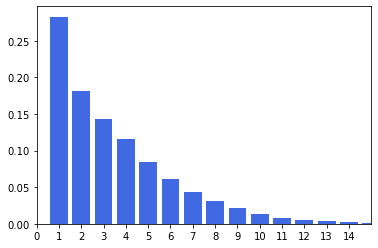

In [8]:
fig, ax = plt.subplots()
ax.bar(score_diff_dict.keys(),score_diff_dict.values(),color='royalblue')
ax.set_xlim(left = 0,right=15)
ax.set_xticks(range(0,15,1));

From this we can see that almost 30% of all games played are won by 1 run meaning the margin of victory is very small. This is one of the reasons that predicting the outcome of games is so hard due to one bad pitch leading to a home run can mean a loss for the defensive team.

## How much more does the home team win?

In [9]:
home_or_away_dict = {
    'home':0,
    'away':0
}
home_win_list = list(df_norm.home_outcome)
total_games = len(home_win_list)
for outcome in home_win_list:
    if outcome == 1:
        home_or_away_dict['home']+=1
    else:
        home_or_away_dict['away']+=1
home_or_away_dict['home'] = home_or_away_dict['home']/total_games
home_or_away_dict['away'] = home_or_away_dict['away']/total_games

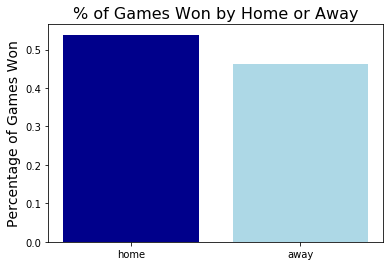

In [38]:
fig,ax = plt.subplots()
ax.bar(home_or_away_dict.keys(),home_or_away_dict.values(),color=['darkblue','lightblue'])
ax.set_ylabel('Percentage of Games Won',fontsize=14)
ax.set_title('% of Games Won by Home or Away',fontsize=16)
plt.savefig('images/home_vs_away')

From this we can see that the home team wins slightly more than the away team. Over 50,000 games this is very important to consider but can be summed up to that a team that does not need to travel and is front of their home crowd.

## Has scoring increased or decreased over the past 20 years?

In [11]:
year_score_dict = {}
for year in range(2000,2020,1):
    year_score_dict[year] = 0
    df_year_scoring = df_norm[(df_norm.Date.dt.year == year)]
    for index, row in df_year_scoring.iterrows():
        year_score_dict[year] += (row.home_team_score+row.away_team_score)

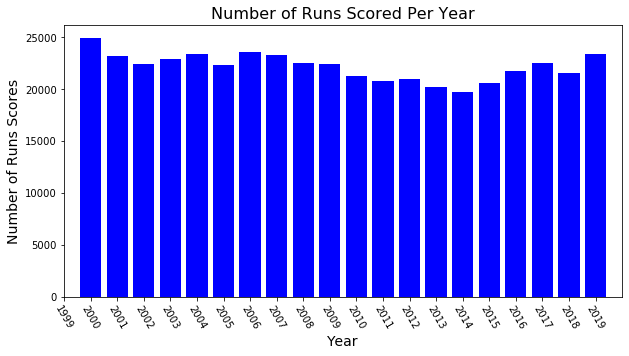

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(year_score_dict.keys(),year_score_dict.values(),color='blue')
ax.set_xlim(left = 1999,right=2020)
ax.set_xticks(range(1999,2020,1));
ax.set_xticklabels(labels = range(1999,2020,1),rotation=-60)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Number of Runs Scores',fontsize=14)
ax.set_title('Number of Runs Scored Per Year',fontsize=16);
plt.savefig('images/runs_per_year')

From this we can see that the scoring has generally been the same for the past 20 years. The difference between the highest scoring year and the lowest is about 5000 runs. In an article written in the New York Times (Now Pitchers Have the Power) they talk about how data was used to increase a teams ability to limit the amount of points scored.

## Does a difference in at bats affect outcome

In [13]:
df_at_bat_viz = df_norm[['home_at_bats','away_at_bats','home_outcome']]
df_at_bat_viz['diff_hits'] = df_at_bat_viz.home_at_bats - df_at_bat_viz.away_at_bats
df_at_bat_viz = df_at_bat_viz[(df_at_bat_viz.diff_hits > -10) & (df_at_bat_viz.diff_hits < 10)]

In [14]:
df_at_bat_group = df_at_bat_viz.groupby('diff_hits').mean()

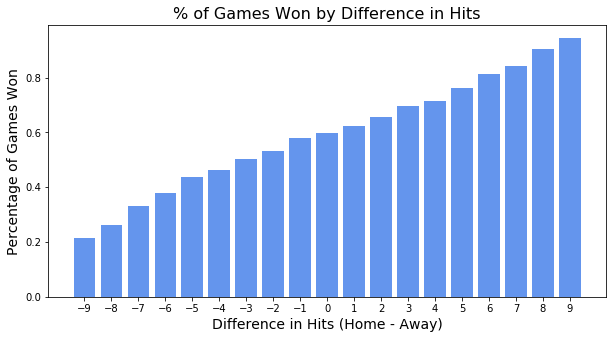

In [40]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(x=df_at_bat_group.index,height=df_at_bat_group.home_outcome,color='cornflowerblue')
ax.set_ylabel("Percentage of Games Won",fontsize=14)
ax.set_xlabel("Difference in Hits (Home - Away)",fontsize=14)
ax.set_xticks(range(-9,10,1))
ax.set_title('% of Games Won by Difference in Hits',fontsize=16);
plt.savefig('images/hit_diff')

From this we can see that teams who can generate more hits on average are much more likely to win the game. This makes sense as the more players you get on base the more players can be in scoring postion.

## How does OBP affect how a team performs

In [16]:
df_obp = df_norm[['home_OBP','away_OBP','home_outcome']]

In [17]:
df_obp = df_obp[(df_obp.home_outcome != -1)]

In [18]:
df_obp['diff_OBP'] = df_obp.home_OBP - df_obp.away_OBP

In [19]:
df_obp_group = df_obp.groupby('home_outcome').mean()

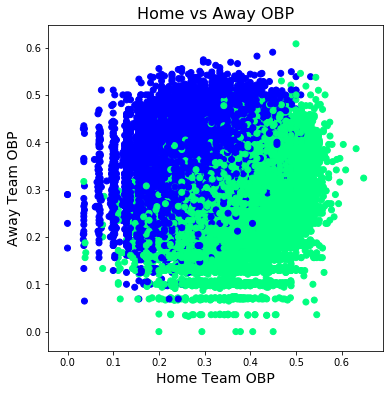

In [41]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(df_obp.home_OBP,df_obp.away_OBP,c=df_obp.home_outcome,cmap='winter')
ax.set_xlabel('Home Team OBP',fontsize=14)
ax.set_ylabel('Away Team OBP',fontsize=14)
ax.set_title('Home vs Away OBP',fontsize=16);
plt.savefig('images/obp_diff')

From this scatter plot we can see that with the smallest advantage in OBP a team is much more likely to win. The reason for this is that the more people you can get on base the better chance of scoring.